In [131]:
!pip install fredapi > /dev/null

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("fivethirtyeight")
pd.set_option("max_columns",500)
from fredapi import Fred
colpal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [133]:
my_api_key="ae02c2b69681af300f640fc50b9f95ef"
len(my_api_key)

32

**1.Create Fred object**

In [134]:
fred =Fred(api_key=my_api_key)

**2.Search for economic data**

In [135]:
sp_search = fred.search("S&P", order_by='popularity',limit=3000)
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-01-30,2023-01-30,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-01-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-30 08:56:06-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-01-30,2023-01-30,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-12-27 08:02:01-06:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-01-30,2023-01-30,S&P 500,2013-01-28,2023-01-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-27 19:10:56-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-01-30,2023-01-30,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-01-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-30 08:56:09-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-01-30,2023-01-30,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-12-27 08:02:04-06:00,82,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTFPPPCMA669NRUG,CTFPPPCMA669NRUG,2023-01-30,2023-01-30,Total Factor Productivity Level at Current Pur...,1964-01-01,2019-01-01,Annual,A,Index USA = 1,Index USA = 1,Not Seasonally Adjusted,NSA,2021-11-08 13:34:59-06:00,1,Source ID: ctfp When using these data in your...
CTFPPPBJA669NRUG,CTFPPPBJA669NRUG,2023-01-30,2023-01-30,Total Factor Productivity Level at Current Pur...,1980-01-01,2019-01-01,Annual,A,Index USA = 1,Index USA = 1,Not Seasonally Adjusted,NSA,2021-11-08 13:35:00-06:00,1,Source ID: ctfp When using these data in your...
PLMCPPUYA670NRUG,PLMCPPUYA670NRUG,2023-01-30,2023-01-30,Price Level of Imports for Uruguay,1950-01-01,2019-01-01,Annual,A,Price Level of USA Output-side GDP in 2017=1,Price Level of USA Output-side GDP in 2017=1,Not Seasonally Adjusted,NSA,2021-11-08 13:30:58-06:00,1,Source ID: pl_m When using these data in your...


In [136]:
sp_search.shape

(3000, 15)

**Pull data and plot**

In [137]:
sp500 = fred.get_series(series_id="SP500")

In [138]:
sp500

2013-01-28    1500.18
2013-01-29    1507.84
2013-01-30    1501.96
2013-01-31    1498.11
2013-02-01    1513.17
               ...   
2023-01-23    4019.81
2023-01-24    4016.95
2023-01-25    4016.22
2023-01-26    4060.43
2023-01-27    4070.56
Length: 2610, dtype: float64

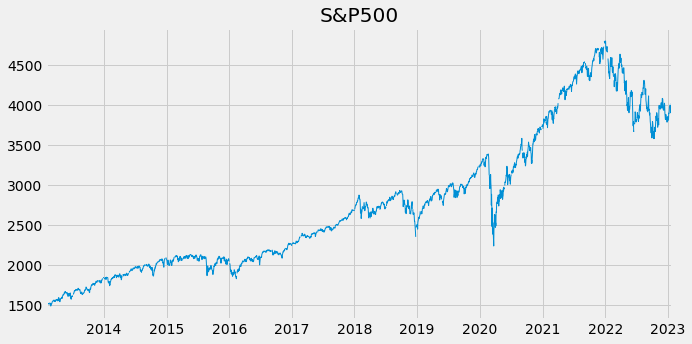

In [139]:
sp500.plot(figsize=(10,5),title="S&P500",lw=1)

**Pull and Join Multiple data series**

In [140]:
unemplo_results =fred.search("unemployement")
unemplo_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-01-30,2023-01-30,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-01-30,2023-01-30,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:28-06:00,54,The unemployment rate represents the number of...
NROU,NROU,2023-01-30,2023-01-30,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,67,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-01-30,2023-01-30,Continued Claims (Insured Unemployment),1967-01-07,2023-01-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-01-26 07:33:05-06:00,72,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-01-30,2023-01-30,Unemployment Level,1948-01-01,2022-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-01-06 07:43:24-06:00,67,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRHUTTTTDKQ156S,LRHUTTTTDKQ156S,2023-01-30,2023-01-30,Harmonised Unemployment - Monthly Rates: Total...,1983-01-01,2022-07-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2022-12-28 15:28:37-06:00,2,OECD descriptor ID: LRHUTTTT OECD unit ID: STS...
LAUMT351074000000003A,LAUMT351074000000003A,2023-01-30,2023-01-30,"Unemployment Rate in Albuquerque, NM (MSA)",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:55:24-05:00,1,None
LAUMT313654000000003A,LAUMT313654000000003A,2023-01-30,2023-01-30,"Unemployment Rate in Omaha-Council Bluffs, NE-...",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:08:48-05:00,1,None


In [141]:
unrate =fred.get_series("UNRATE")

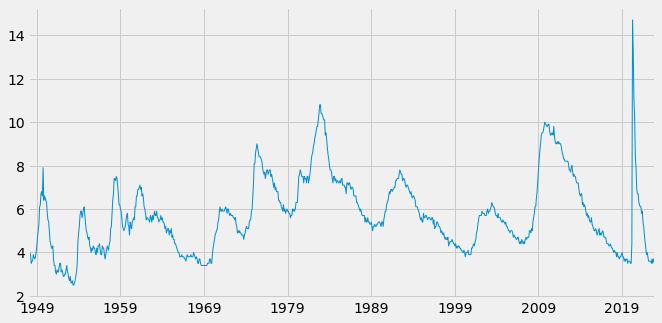

In [142]:
unrate.plot(figsize=(10,5),lw=1)

In [143]:
fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-01-30,2023-01-30,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-01-30,2023-01-30,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:28-06:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2023-01-30,2023-01-30,Continued Claims (Insured Unemployment),1967-01-07,2023-01-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-01-26 07:33:05-06:00,72,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-01-30,2023-01-30,Continued Claims (Insured Unemployment),1967-01-07,2023-01-14,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-01-26 07:33:11-06:00,28,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-01-30,2023-01-30,Unemployment Level,1948-01-01,2022-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-01-06 07:43:24-06:00,67,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GREE637URN,GREE637URN,2023-01-30,2023-01-30,"Unemployment Rate in Greensboro-High Point, NC...",1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:22:03-06:00,7,None
SHRE322URN,SHRE322URN,2023-01-30,2023-01-30,"Unemployment Rate in Shreveport-Bossier City, ...",1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:14:06-06:00,7,None
LAUMT471686000000003A,LAUMT471686000000003A,2023-01-30,2023-01-30,"Unemployment Rate in Chattanooga, TN-GA (MSA)",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:07:52-05:00,1,None


In [144]:
unempl_dataframe = fred.search('Unemployment Rate in',filter=("frequency","Monthly"))
unempl_dataframe

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-01-30,2023-01-30,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-01-30,2023-01-30,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:28-06:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-01-30,2023-01-30,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,64,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-01-30,2023-01-30,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:56-06:00,24,The series comes from the 'Current Population ...
CAUR,CAUR,2023-01-30,2023-01-30,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,55,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CANAPA0URN,CANAPA0URN,2023-01-30,2023-01-30,"Unemployment Rate in Napa County, CA",1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:14:12-06:00,4,These data come from the Current Population Su...
MODUURN,MODUURN,2023-01-30,2023-01-30,"Unemployment Rate in Dunklin County, MO",1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:25:07-06:00,4,These data come from the Current Population Su...
INVAURN,INVAURN,2023-01-30,2023-01-30,"Unemployment Rate in Vanderburgh County, IN",1990-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-29 10:13:05-06:00,4,These data come from the Current Population Su...


In [145]:
unempl_dataframe = unempl_dataframe.query('seasonal_adjustment	== "Seasonally Adjusted" and units =="Percent"')
unempl_dataframe = unempl_dataframe.loc[unempl_dataframe["title"].str.contains("Unemployment Rate in")]
unempl_dataframe


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-01-30,2023-01-30,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,55,None
TXUR,TXUR,2023-01-30,2023-01-30,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:03-06:00,47,None
NYUR,NYUR,2023-01-30,2023-01-30,Unemployment Rate in New York,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:02-06:00,47,None
FLUR,FLUR,2023-01-30,2023-01-30,Unemployment Rate in Florida,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,46,None
AURUKM,AURUKM,2023-01-30,2023-01-30,Unemployment Rate in the United Kingdom,1855-01-01,2016-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2017-08-23 14:01:02-05:00,42,This series was constructed by the Bank of Eng...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSOUUR,CSOUUR,2023-01-30,2023-01-30,Unemployment Rate in South Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:23-06:00,8,None
CWSTUR,CWSTUR,2023-01-30,2023-01-30,Unemployment Rate in West Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:25-06:00,7,None
CNEWUR,CNEWUR,2023-01-30,2023-01-30,Unemployment Rate in New England Census Division,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:26-06:00,6,None


In [146]:
all_results=[]
for myindx in unempl_dataframe.index:
  result =fred.get_series(myindx)
  result=result.to_frame(name=myindx)
  if result.shape[0]==564:
    #print(result.isna().sum())
    #print(result.shape[0])
    all_results.append(result)

In [147]:
print(all_results[0])

            CAUR
1976-01-01   9.2
1976-02-01   9.2
1976-03-01   9.1
1976-04-01   9.1
1976-05-01   9.0
...          ...
2022-08-01   4.1
2022-09-01   3.8
2022-10-01   4.0
2022-11-01   4.1
2022-12-01   4.1

[564 rows x 1 columns]


In [148]:
pd.concat(all_results, axis=1).tail(100)

,CAUR,TXUR,NYUR,FLUR,OHUR,MIUR,ALUR,NCUR,NJUR,PAUR,KYUR,MAUR,ILUR,WIUR,IAUR,COUR,WAUR,NMUR,MNUR,TNUR,INUR,MOUR,VAUR,GAUR,WVUR,AZUR,NVUR,UTUR,SCUR,ARUR,ORUR,NDUR,LAUR,MDUR,OKUR,AKUR,MSUR,HIUR,KSUR,IDUR,DCUR,MEUR,CTUR,NEUR,SDUR,MTUR,WYUR,DEUR,CMWRUR,NHUR,CNERUR,RIUR,VTUR,CSOUUR,CWSTUR,CNEWUR,CESCUR
2014-09-01,7.3,5.0,6.0,6.2,5.5,6.8,6.5,6.0,6.6,5.6,5.9,5.6,6.6,5.0,4.2,4.5,5.8,6.5,4.0,6.5,5.8,5.9,5.0,7.0,6.4,6.7,7.8,3.6,6.5,5.7,6.4,2.6,6.7,5.6,4.1,6.7,7.4,4.1,4.4,4.0,7.6,5.3,6.4,3.1,3.3,4.6,4.4,5.4,5.5,4.1,5.9,7.3,4.0,5.9,6.5,5.7,6.5
2014-10-01,7.2,4.9,5.9,6.1,5.4,6.6,6.4,5.9,6.5,5.6,5.7,5.5,6.5,5.0,4.1,4.4,5.8,6.4,4.0,6.4,5.7,5.8,4.9,6.8,6.4,6.6,7.7,3.6,6.6,5.6,6.3,2.6,6.8,5.5,4.1,6.5,7.2,4.0,4.3,4.0,7.6,5.2,6.3,3.1,3.3,4.5,4.3,5.3,5.4,4.1,5.8,7.1,4.0,5.8,6.4,5.6,6.4
2014-11-01,7.1,4.8,5.8,6.0,5.3,6.4,6.3,5.8,6.5,5.5,5.5,5.4,6.3,4.9,4.0,4.3,5.7,6.4,3.9,6.3,5.6,5.7,4.9,6.7,6.3,6.5,7.6,3.6,6.5,5.6,6.2,2.6,6.8,5.5,4.0,6.4,7.1,3.9,4.3,3.9,7.5,5.2,6.2,3.0,3.2,4.5,4.1,5.2,5.3,4.0,5.8,6.9,3.9,5.7,6.3,5.5,6.2
2014-12-01,6.9,4.6,5.8,6.0,5.2,6.2,6.2,5.7,6.4,5.5,5.4,5.2,6.2,4.8,3.9,4.2,5.7,6.4,3.9,6.2,5.5,5.7,4.8,6.6,6.4,6.4,7.5,3.6,6.5,5.5,6.0,2.6,6.8,5.4,4.0,6.3,6.9,3.9,4.3,3.9,7.4,5.0,6.1,3.0,3.2,4.4,4.0,5.1,5.2,3.9,5.7,6.7,3.9,5.6,6.2,5.3,6.1
2015-01-01,6.8,4.6,5.7,5.9,5.2,6.0,6.1,5.7,6.3,5.5,5.3,5.2,6.1,4.7,3.9,4.1,5.6,6.5,3.8,6.1,5.4,5.6,4.8,6.5,6.4,6.4,7.4,3.6,6.4,5.5,5.8,2.6,6.8,5.4,4.0,6.2,6.8,3.8,4.3,3.8,7.4,4.9,6.0,2.9,3.2,4.3,3.9,5.0,5.1,3.8,5.6,6.6,3.8,5.5,6.1,5.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,4.1,4.7,2.7,4.0,4.1,2.6,3.5,4.0,4.2,3.8,3.6,4.5,3.1,2.6,3.4,3.7,4.4,1.9,3.4,2.8,2.5,2.6,2.8,3.9,3.5,4.4,2.0,3.1,3.4,3.7,2.3,3.5,4.3,3.1,4.6,3.6,4.0,2.5,2.7,5.1,3.1,4.1,2.1,2.3,2.8,3.1,4.5,3.4,2.0,4.1,2.8,2.1,3.4,3.7,3.4,3.3
2022-09-01,3.8,4.0,4.3,2.5,4.0,4.1,2.6,3.6,3.3,4.1,3.8,3.4,4.5,3.2,2.7,3.4,3.7,4.2,2.0,3.4,2.8,2.4,2.6,2.8,4.0,3.7,4.4,2.1,3.2,3.5,3.8,2.2,3.4,4.0,3.2,4.4,3.6,3.5,2.6,2.8,4.7,3.3,4.0,2.2,2.3,2.9,3.3,4.3,3.4,2.2,3.9,3.1,2.1,3.3,3.7,3.3,3.3
2022-10-01,4.0,4.0,4.3,2.7,4.2,4.2,2.7,3.8,3.4,4.0,3.9,3.5,4.6,3.3,2.9,3.6,3.8,4.3,2.1,3.5,3.0,2.6,2.7,2.9,4.0,3.9,4.6,2.1,3.3,3.6,4.1,2.3,3.3,4.5,3.4,4.5,3.8,3.3,2.8,2.9,4.8,3.6,4.3,2.4,2.4,3.0,3.5,4.3,3.5,2.4,3.9,3.4,2.3,3.4,3.8,3.4,3.4
2022-11-01,4.1,4.0,4.3,2.6,4.2,4.3,2.7,3.9,3.4,4.0,4.0,3.4,4.7,3.3,3.1,3.5,4.0,4.1,2.3,3.5,3.0,2.7,2.8,3.0,4.1,4.1,4.9,2.2,3.3,3.7,4.3,2.3,3.3,4.3,3.4,4.5,3.9,3.3,2.8,3.0,4.6,3.7,4.2,2.5,2.4,2.9,3.6,4.4,3.6,2.6,3.8,3.6,2.5,3.4,3.9,3.4,3.5


In [149]:
unempl_results =pd.concat(all_results, axis=1)

In [150]:
unempl_results

,CAUR,TXUR,NYUR,FLUR,OHUR,MIUR,ALUR,NCUR,NJUR,PAUR,KYUR,MAUR,ILUR,WIUR,IAUR,COUR,WAUR,NMUR,MNUR,TNUR,INUR,MOUR,VAUR,GAUR,WVUR,AZUR,NVUR,UTUR,SCUR,ARUR,ORUR,NDUR,LAUR,MDUR,OKUR,AKUR,MSUR,HIUR,KSUR,IDUR,DCUR,MEUR,CTUR,NEUR,SDUR,MTUR,WYUR,DEUR,CMWRUR,NHUR,CNERUR,RIUR,VTUR,CSOUUR,CWSTUR,CNEWUR,CESCUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.4,10.3,8.0,5.6,10.5,6.6,5.8,4.3,5.8,8.5,8.6,6.0,6.0,6.6,5.9,6.1,8.4,7.5,10.2,9.2,5.8,7.4,7.3,9.5,3.4,6.3,6.4,5.8,7.1,6.7,9.8,4.2,5.6,8.7,8.7,9.8,3.3,3.3,5.8,4.1,8.0,6.8,6.5,9.6,7.8,8.6,6.9,8.6,9.6,6.2
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.4,10.3,8.1,5.6,10.5,6.6,5.8,4.3,5.7,8.5,8.7,6.0,6.0,6.6,5.9,6.1,8.4,7.5,10.2,9.2,5.9,7.4,7.3,9.5,3.4,6.3,6.4,5.8,7.1,6.7,9.8,4.2,5.6,8.7,8.7,9.8,3.3,3.3,5.8,4.1,8.0,6.8,6.5,9.6,7.8,8.6,6.9,8.6,9.6,6.2
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,6.4,10.3,8.1,5.6,10.5,6.6,5.7,4.3,5.7,8.4,8.7,5.9,6.0,6.5,5.9,6.1,8.4,7.5,10.1,9.2,5.8,7.3,7.3,9.4,3.4,6.3,6.4,5.8,7.0,6.6,9.8,4.2,5.6,8.6,8.6,9.8,3.3,3.2,5.8,4.1,8.0,6.8,6.5,9.6,7.7,8.6,6.9,8.6,9.6,6.1
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,6.3,10.3,8.1,5.6,10.3,6.6,5.6,4.2,5.6,8.5,8.6,5.8,6.0,6.3,6.0,6.0,8.3,7.5,10.0,9.0,5.8,7.2,7.2,9.2,3.5,6.4,6.4,5.8,6.9,6.4,9.7,4.2,5.6,8.5,8.6,9.6,3.2,3.1,5.8,4.0,8.1,6.7,6.5,9.5,7.7,8.6,6.8,8.5,9.4,6.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,6.1,10.3,8.1,5.5,10.1,6.6,5.5,4.1,5.6,8.5,8.6,5.7,5.9,6.0,6.0,5.9,8.1,7.4,9.8,8.9,5.7,7.0,7.1,9.1,3.6,6.5,6.5,5.7,6.9,6.3,9.4,4.2,5.6,8.4,8.5,9.4,3.1,3.1,5.8,3.9,8.3,6.6,6.5,9.5,7.7,8.5,6.7,8.5,9.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,4.1,4.7,2.7,4.0,4.1,2.6,3.5,4.0,4.2,3.8,3.6,4.5,3.1,2.6,3.4,3.7,4.4,1.9,3.4,2.8,2.5,2.6,2.8,3.9,3.5,4.4,2.0,3.1,3.4,3.7,2.3,3.5,4.3,3.1,4.6,3.6,4.0,2.5,2.7,5.1,3.1,4.1,2.1,2.3,2.8,3.1,4.5,3.4,2.0,4.1,2.8,2.1,3.4,3.7,3.4,3.3
2022-09-01,3.8,4.0,4.3,2.5,4.0,4.1,2.6,3.6,3.3,4.1,3.8,3.4,4.5,3.2,2.7,3.4,3.7,4.2,2.0,3.4,2.8,2.4,2.6,2.8,4.0,3.7,4.4,2.1,3.2,3.5,3.8,2.2,3.4,4.0,3.2,4.4,3.6,3.5,2.6,2.8,4.7,3.3,4.0,2.2,2.3,2.9,3.3,4.3,3.4,2.2,3.9,3.1,2.1,3.3,3.7,3.3,3.3
2022-10-01,4.0,4.0,4.3,2.7,4.2,4.2,2.7,3.8,3.4,4.0,3.9,3.5,4.6,3.3,2.9,3.6,3.8,4.3,2.1,3.5,3.0,2.6,2.7,2.9,4.0,3.9,4.6,2.1,3.3,3.6,4.1,2.3,3.3,4.5,3.4,4.5,3.8,3.3,2.8,2.9,4.8,3.6,4.3,2.4,2.4,3.0,3.5,4.3,3.5,2.4,3.9,3.4,2.3,3.4,3.8,3.4,3.4
2022-11-01,4.1,4.0,4.3,2.6,4.2,4.3,2.7,3.9,3.4,4.0,4.0,3.4,4.7,3.3,3.1,3.5,4.0,4.1,2.3,3.5,3.0,2.7,2.8,3.0,4.1,4.1,4.9,2.2,3.3,3.7,4.3,2.3,3.3,4.3,3.4,4.5,3.9,3.3,2.8,3.0,4.6,3.7,4.2,2.5,2.4,2.9,3.6,4.4,3.6,2.6,3.8,3.6,2.5,3.4,3.9,3.4,3.5


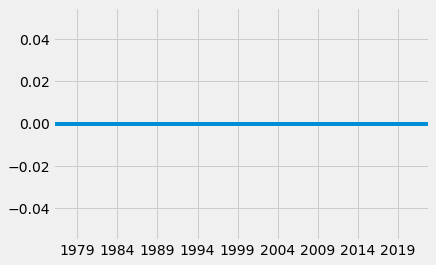

In [151]:
unempl_results.isna().sum(axis=1).plot()

In [152]:
unuemploymentStates =unempl_results

**PLot states unemployement rate**

In [153]:
px.line(unuemploymentStates)

**Pull unemployment rate on particular date**

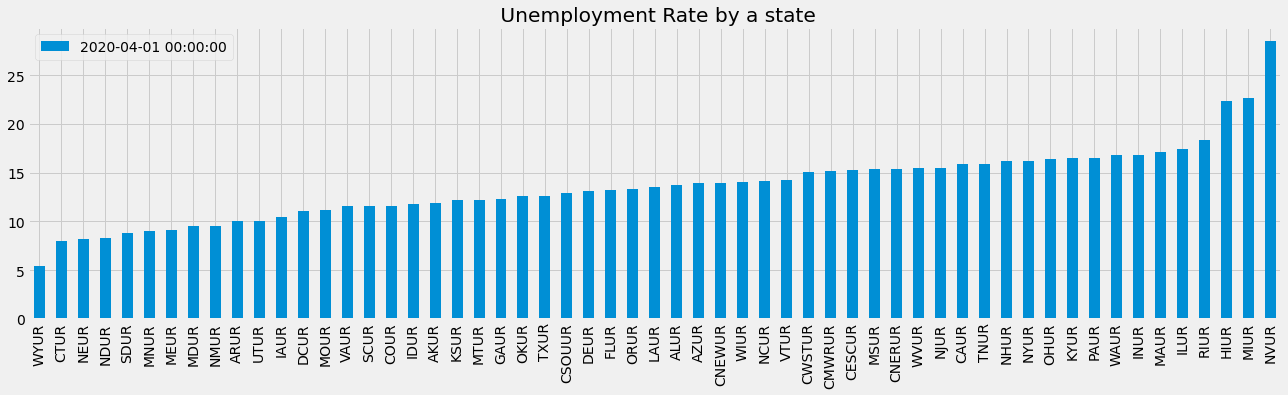

In [154]:
ax =unuemploymentStates.loc[unuemploymentStates.index=="2020-04-01"].\
T\
.sort_values("2020-04-01")\
.plot(figsize=(20,5),kind="bar", title=" Unemployment Rate by a state")
plt.show()

In [155]:
States_dict =unempl_dataframe["title"].str.replace("Unemployment Rate in","").to_dict()


In [156]:
States_dict

{'CAUR': ' California',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'FLUR': ' Florida',
 'AURUKM': ' the United Kingdom',
 'OHUR': ' Ohio',
 'MIUR': ' Michigan',
 'ALUR': ' Alabama',
 'NCUR': ' North Carolina',
 'NJUR': ' New Jersey',
 'PAUR': ' Pennsylvania',
 'KYUR': ' Kentucky',
 'MAUR': ' Massachusetts',
 'ILUR': ' Illinois',
 'WIUR': ' Wisconsin',
 'IAUR': ' Iowa',
 'COUR': ' Colorado',
 'WAUR': ' Washington',
 'NMUR': ' New Mexico',
 'MNUR': ' Minnesota',
 'TNUR': ' Tennessee',
 'INUR': ' Indiana',
 'MOUR': ' Missouri',
 'VAUR': ' Virginia',
 'GAUR': ' Georgia',
 'WVUR': ' West Virginia',
 'AZUR': ' Arizona',
 'NVUR': ' Nevada',
 'UTUR': ' Utah',
 'SCUR': ' South Carolina',
 'ARUR': ' Arkansas',
 'ORUR': ' Oregon',
 'NDUR': ' North Dakota',
 'LAUR': ' Louisiana',
 'MDUR': ' Maryland',
 'OKUR': ' Oklahoma',
 'LASMT261982000000003': ' Detroit-Warren-Dearborn, MI (MSA)',
 'AKUR': ' Alaska',
 'MSUR': ' Mississippi',
 'HIUR': ' Hawaii',
 'PRUR': ' Puerto Rico',
 'KSUR': ' Kansas',
 'IDU

In [157]:
#for namcol in unuemploymentStates.columns:
  #if namcol in States_dict.keys():
    #unuemploymentStates.rename(columns={namcol:States_dict[namcol]},inplace=True)


In [158]:
#Using List Comprehension
unuemploymentStates.columns=[States_dict[namcol] for namcol in unuemploymentStates.columns ]

In [159]:
unuemploymentStates

,California,Texas,New York,Florida,Ohio,Michigan,Alabama,North Carolina,New Jersey,Pennsylvania,Kentucky,Massachusetts,Illinois,Wisconsin,Iowa,Colorado,Washington,New Mexico,Minnesota,Tennessee,Indiana,Missouri,Virginia,Georgia,West Virginia,Arizona,Nevada,Utah,South Carolina,Arkansas,Oregon,North Dakota,Louisiana,Maryland,Oklahoma,Alaska,Mississippi,Hawaii,Kansas,Idaho,the District of Columbia,Maine,Connecticut,Nebraska,South Dakota,Montana,Wyoming,Delaware,Midwest Census Region,New Hampshire,Northeast Census Region,Rhode Island,Vermont,South Census Region,West Census Region,New England Census Division,East South Central Census Division
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.4,10.3,8.0,5.6,10.5,6.6,5.8,4.3,5.8,8.5,8.6,6.0,6.0,6.6,5.9,6.1,8.4,7.5,10.2,9.2,5.8,7.4,7.3,9.5,3.4,6.3,6.4,5.8,7.1,6.7,9.8,4.2,5.6,8.7,8.7,9.8,3.3,3.3,5.8,4.1,8.0,6.8,6.5,9.6,7.8,8.6,6.9,8.6,9.6,6.2
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.4,10.3,8.1,5.6,10.5,6.6,5.8,4.3,5.7,8.5,8.7,6.0,6.0,6.6,5.9,6.1,8.4,7.5,10.2,9.2,5.9,7.4,7.3,9.5,3.4,6.3,6.4,5.8,7.1,6.7,9.8,4.2,5.6,8.7,8.7,9.8,3.3,3.3,5.8,4.1,8.0,6.8,6.5,9.6,7.8,8.6,6.9,8.6,9.6,6.2
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,6.4,10.3,8.1,5.6,10.5,6.6,5.7,4.3,5.7,8.4,8.7,5.9,6.0,6.5,5.9,6.1,8.4,7.5,10.1,9.2,5.8,7.3,7.3,9.4,3.4,6.3,6.4,5.8,7.0,6.6,9.8,4.2,5.6,8.6,8.6,9.8,3.3,3.2,5.8,4.1,8.0,6.8,6.5,9.6,7.7,8.6,6.9,8.6,9.6,6.1
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,6.3,10.3,8.1,5.6,10.3,6.6,5.6,4.2,5.6,8.5,8.6,5.8,6.0,6.3,6.0,6.0,8.3,7.5,10.0,9.0,5.8,7.2,7.2,9.2,3.5,6.4,6.4,5.8,6.9,6.4,9.7,4.2,5.6,8.5,8.6,9.6,3.2,3.1,5.8,4.0,8.1,6.7,6.5,9.5,7.7,8.6,6.8,8.5,9.4,6.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,6.1,10.3,8.1,5.5,10.1,6.6,5.5,4.1,5.6,8.5,8.6,5.7,5.9,6.0,6.0,5.9,8.1,7.4,9.8,8.9,5.7,7.0,7.1,9.1,3.6,6.5,6.5,5.7,6.9,6.3,9.4,4.2,5.6,8.4,8.5,9.4,3.1,3.1,5.8,3.9,8.3,6.6,6.5,9.5,7.7,8.5,6.7,8.5,9.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,4.1,4.7,2.7,4.0,4.1,2.6,3.5,4.0,4.2,3.8,3.6,4.5,3.1,2.6,3.4,3.7,4.4,1.9,3.4,2.8,2.5,2.6,2.8,3.9,3.5,4.4,2.0,3.1,3.4,3.7,2.3,3.5,4.3,3.1,4.6,3.6,4.0,2.5,2.7,5.1,3.1,4.1,2.1,2.3,2.8,3.1,4.5,3.4,2.0,4.1,2.8,2.1,3.4,3.7,3.4,3.3
2022-09-01,3.8,4.0,4.3,2.5,4.0,4.1,2.6,3.6,3.3,4.1,3.8,3.4,4.5,3.2,2.7,3.4,3.7,4.2,2.0,3.4,2.8,2.4,2.6,2.8,4.0,3.7,4.4,2.1,3.2,3.5,3.8,2.2,3.4,4.0,3.2,4.4,3.6,3.5,2.6,2.8,4.7,3.3,4.0,2.2,2.3,2.9,3.3,4.3,3.4,2.2,3.9,3.1,2.1,3.3,3.7,3.3,3.3
2022-10-01,4.0,4.0,4.3,2.7,4.2,4.2,2.7,3.8,3.4,4.0,3.9,3.5,4.6,3.3,2.9,3.6,3.8,4.3,2.1,3.5,3.0,2.6,2.7,2.9,4.0,3.9,4.6,2.1,3.3,3.6,4.1,2.3,3.3,4.5,3.4,4.5,3.8,3.3,2.8,2.9,4.8,3.6,4.3,2.4,2.4,3.0,3.5,4.3,3.5,2.4,3.9,3.4,2.3,3.4,3.8,3.4,3.4
2022-11-01,4.1,4.0,4.3,2.6,4.2,4.3,2.7,3.9,3.4,4.0,4.0,3.4,4.7,3.3,3.1,3.5,4.0,4.1,2.3,3.5,3.0,2.7,2.8,3.0,4.1,4.1,4.9,2.2,3.3,3.7,4.3,2.3,3.3,4.3,3.4,4.5,3.9,3.3,2.8,3.0,4.6,3.7,4.2,2.5,2.4,2.9,3.6,4.4,3.6,2.6,3.8,3.6,2.5,3.4,3.9,3.4,3.5


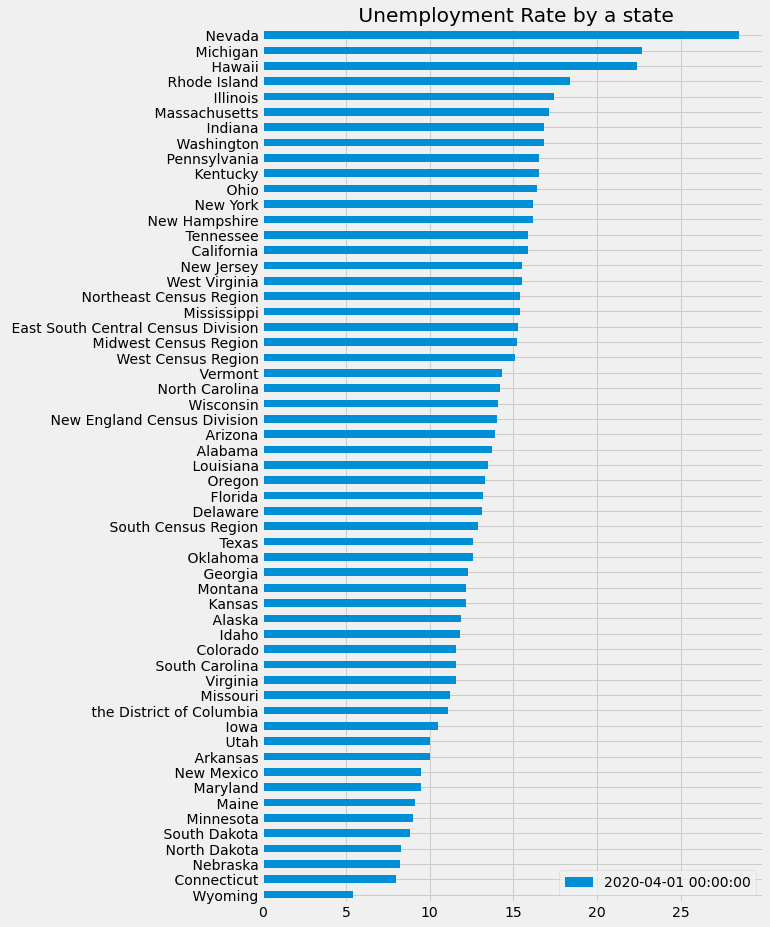

In [160]:
ax =unuemploymentStates.loc[unuemploymentStates.index=="2020-04-01"].\
T\
.sort_values("2020-04-01")\
.plot(figsize=(8,15),kind="barh", title=" Unemployment Rate by a state")
plt.show()

**Pull participation Rate, essentially it means how many people participated in a job market**

In [161]:
ParticipationRate = fred.search('participation rate state',filter=("frequency","Monthly"))
ParticipationRate = ParticipationRate.query('seasonal_adjustment	== "Seasonally Adjusted" and units =="Percent"')
ParticipationRate = ParticipationRate.loc[ParticipationRate["title"].str.contains("Labor Force Participation Rate for")]
ParticipationRate

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2023-01-30,2023-01-30,Labor Force Participation Rate for California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:04-06:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2023-01-30,2023-01-30,Labor Force Participation Rate for Alabama,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:07-06:00,7,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2023-01-30,2023-01-30,Labor Force Participation Rate for Florida,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:03-06:00,24,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-01-30,2023-01-30,Labor Force Participation Rate for Wisconsin,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:02-06:00,25,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2023-01-30,2023-01-30,Labor Force Participation Rate for Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:05-06:00,23,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2023-01-30,2023-01-30,Labor Force Participation Rate for Minnesota,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:01-06:00,22,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2023-01-30,2023-01-30,Labor Force Participation Rate for New York,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:03-06:00,22,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2023-01-30,2023-01-30,Labor Force Participation Rate for Michigan,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:04-06:00,21,A state's labor-force participation rate is th...
LBSSA54,LBSSA54,2023-01-30,2023-01-30,Labor Force Participation Rate for West Virginia,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:05-06:00,20,A state's labor-force participation rate is th...


In [162]:
part_id_to_dict =ParticipationRate["title"].str.replace("Labor Force Participation Rate for","").to_dict()

In [163]:
ParticipationRate.index

Index(['LBSSA06', 'LBSSA01', 'LBSSA12', 'LBSSA55', 'LBSSA48', 'LBSSA27',
       'LBSSA36', 'LBSSA26', 'LBSSA54', 'LBSSA49', 'LBSSA39', 'LBSSA08',
       'LBSSA21', 'LBSSA19', 'LBSSA35', 'LBSSA42', 'LBSSA13', 'LBSSA25',
       'LBSSA37', 'LBSSA28', 'LBSSA47', 'LBSSA40', 'LBSSA18', 'LBSSA17',
       'LBSSA29', 'LBSSA51', 'LBSSA23', 'LBSSA41', 'LBSSA22', 'LBSSA50',
       'LBSSA30', 'LBSSA16', 'LBSSA45', 'LBSSA53', 'LBSSA31', 'LBSSA24',
       'LBSSA20', 'LBSSA04', 'LBSSA15', 'LBSSA38', 'LBSSA09', 'LBSSA32',
       'LBSSA05', 'LBSSA02', 'LBSSA34', 'LBSSA33', 'LBSSA46', 'LBSSA56',
       'LBSSA10', 'LBSSA44', 'LBSSA11'],
      dtype='object', name='series id')

In [164]:
part_id_to_dict

{'LBSSA06': ' California',
 'LBSSA01': ' Alabama',
 'LBSSA12': ' Florida',
 'LBSSA55': ' Wisconsin',
 'LBSSA48': ' Texas',
 'LBSSA27': ' Minnesota',
 'LBSSA36': ' New York',
 'LBSSA26': ' Michigan',
 'LBSSA54': ' West Virginia',
 'LBSSA49': ' Utah',
 'LBSSA39': ' Ohio',
 'LBSSA08': ' Colorado',
 'LBSSA21': ' Kentucky',
 'LBSSA19': ' Iowa',
 'LBSSA35': ' New Mexico',
 'LBSSA42': ' Pennsylvania',
 'LBSSA13': ' Georgia',
 'LBSSA25': ' Massachusetts',
 'LBSSA37': ' North Carolina',
 'LBSSA28': ' Mississippi',
 'LBSSA47': ' Tennessee',
 'LBSSA40': ' Oklahoma',
 'LBSSA18': ' Indiana',
 'LBSSA17': ' Illinois',
 'LBSSA29': ' Missouri',
 'LBSSA51': ' Virginia',
 'LBSSA23': ' Maine',
 'LBSSA41': ' Oregon',
 'LBSSA22': ' Louisiana',
 'LBSSA50': ' Vermont',
 'LBSSA30': ' Montana',
 'LBSSA16': ' Idaho',
 'LBSSA45': ' South Carolina',
 'LBSSA53': ' Washington',
 'LBSSA31': ' Nebraska',
 'LBSSA24': ' Maryland',
 'LBSSA20': ' Kansas',
 'LBSSA04': ' Arizona',
 'LBSSA15': ' Hawaii',
 'LBSSA38': ' North 

In [166]:
part_all_results=[]
for myindx in ParticipationRate.index:
  part_result =fred.get_series(myindx)
  part_result=part_result.to_frame(name=myindx)
  if part_result.shape[0]==564:
    print(part_result.isna().sum())
    print(part_result.shape[0])
    part_all_results.append(part_result)

LBSSA06    0
dtype: int64
564
LBSSA01    0
dtype: int64
564
LBSSA12    0
dtype: int64
564
LBSSA55    0
dtype: int64
564
LBSSA48    0
dtype: int64
564
LBSSA27    0
dtype: int64
564
LBSSA36    0
dtype: int64
564
LBSSA26    0
dtype: int64
564
LBSSA54    0
dtype: int64
564
LBSSA49    0
dtype: int64
564
LBSSA39    0
dtype: int64
564
LBSSA08    0
dtype: int64
564
LBSSA21    0
dtype: int64
564
LBSSA19    0
dtype: int64
564
LBSSA35    0
dtype: int64
564
LBSSA42    0
dtype: int64
564
LBSSA13    0
dtype: int64
564
LBSSA25    0
dtype: int64
564
LBSSA37    0
dtype: int64
564
LBSSA28    0
dtype: int64
564
LBSSA47    0
dtype: int64
564
LBSSA40    0
dtype: int64
564
LBSSA18    0
dtype: int64
564
LBSSA17    0
dtype: int64
564
LBSSA29    0
dtype: int64
564
LBSSA51    0
dtype: int64
564
LBSSA23    0
dtype: int64
564
LBSSA41    0
dtype: int64
564
LBSSA22    0
dtype: int64
564
LBSSA50    0
dtype: int64
564
LBSSA30    0
dtype: int64
564
LBSSA16    0
dtype: int64
564
LBSSA45    0
dtype: int64
564
LBSSA53   

In [167]:
part_results =pd.concat(part_all_results, axis=1)

In [168]:
part_results


,LBSSA06,LBSSA01,LBSSA12,LBSSA55,LBSSA48,LBSSA27,LBSSA36,LBSSA26,LBSSA54,LBSSA49,LBSSA39,LBSSA08,LBSSA21,LBSSA19,LBSSA35,LBSSA42,LBSSA13,LBSSA25,LBSSA37,LBSSA28,LBSSA47,LBSSA40,LBSSA18,LBSSA17,LBSSA29,LBSSA51,LBSSA23,LBSSA41,LBSSA22,LBSSA50,LBSSA30,LBSSA16,LBSSA45,LBSSA53,LBSSA31,LBSSA24,LBSSA20,LBSSA04,LBSSA15,LBSSA38,LBSSA09,LBSSA32,LBSSA05,LBSSA02,LBSSA34,LBSSA33,LBSSA46,LBSSA56,LBSSA10,LBSSA44,LBSSA11
1976-01-01,62.6,57.0,55.8,65.6,63.8,65.6,58.0,61.6,52.5,62.8,61.7,67.2,60.5,64.4,60.8,58.4,63.7,64.8,66.5,58.8,59.6,59.3,64.0,63.0,60.5,65.9,62.1,62.9,56.8,63.6,62.7,63.0,65.3,60.9,64.9,64.3,65.1,59.5,69.9,62.6,64.2,71.3,57.9,69.0,61.5,65.9,64.6,65.3,62.7,63.8,64.4
1976-02-01,62.4,56.9,55.7,65.5,63.5,65.5,58.0,61.5,52.4,62.6,61.7,67.0,60.3,64.3,60.5,58.3,63.6,64.7,66.3,58.6,59.4,59.2,63.9,63.0,60.3,65.8,61.9,62.7,56.6,63.4,62.5,62.8,65.2,60.7,64.9,64.2,65.0,59.2,69.6,62.4,64.1,70.8,57.8,68.4,61.4,65.6,64.4,64.9,62.5,63.7,64.5
1976-03-01,62.2,56.8,55.5,65.4,63.4,65.4,58.0,61.5,52.3,62.5,61.7,66.8,60.2,64.2,60.3,58.3,63.5,64.6,66.2,58.5,59.3,59.1,63.8,62.9,60.3,65.6,61.9,62.5,56.5,63.2,62.4,62.7,65.0,60.6,64.8,64.1,64.9,59.1,69.6,62.3,64.0,70.5,57.7,67.8,61.4,65.6,64.4,64.7,62.5,63.6,64.5
1976-04-01,62.2,56.8,55.5,65.4,63.5,65.4,58.0,61.6,52.3,62.5,61.6,66.6,60.1,64.1,60.3,58.3,63.5,64.6,66.2,58.5,59.3,59.0,63.8,62.9,60.4,65.5,61.8,62.4,56.4,63.5,62.3,62.7,64.9,60.6,64.8,64.1,65.0,59.1,69.4,62.5,64.1,70.4,57.7,67.9,61.5,65.7,64.3,64.9,62.4,63.7,64.5
1976-05-01,62.3,56.8,55.4,65.5,63.6,65.5,58.1,61.7,52.2,62.6,61.6,66.5,60.1,64.1,60.3,58.3,63.6,64.6,66.3,58.5,59.4,59.0,63.9,63.0,60.6,65.4,61.7,62.5,56.4,63.6,62.2,62.8,64.7,60.7,64.8,64.1,65.1,59.1,69.3,62.6,64.3,70.5,57.7,67.9,61.6,66.0,64.3,65.2,62.4,63.6,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,62.5,57.2,59.5,65.9,63.8,68.2,60.5,60.1,55.2,68.1,61.8,69.6,58.0,67.7,56.5,61.7,62.1,65.8,60.6,55.3,60.8,60.7,63.4,64.6,62.4,63.7,58.6,63.5,58.7,61.8,62.7,62.7,57.0,64.8,69.9,66.1,66.2,61.0,61.0,69.0,64.7,60.3,56.8,65.9,63.3,65.8,68.9,63.2,61.0,63.7,73.0
2022-09-01,62.3,57.2,59.5,65.6,63.6,68.1,60.3,60.1,55.1,68.0,61.7,69.4,58.0,67.7,56.3,61.7,62.0,65.6,60.6,55.2,60.5,60.6,63.4,64.5,62.4,63.6,58.4,63.3,58.5,61.8,62.6,62.7,56.9,64.7,69.9,65.7,66.1,61.1,60.8,68.8,64.6,60.6,56.8,65.7,63.0,65.9,68.7,63.1,60.8,63.9,72.7
2022-10-01,62.3,57.2,59.6,65.3,63.6,68.0,60.5,60.0,55.0,67.9,61.5,69.4,57.9,67.7,56.1,61.7,61.8,65.5,60.5,55.0,60.1,60.6,63.3,64.4,62.4,63.6,58.3,63.2,58.3,61.7,62.5,62.6,56.7,64.5,69.8,65.9,66.0,61.1,60.8,68.7,64.5,60.9,56.7,65.6,63.3,65.9,68.6,63.0,60.7,63.9,72.5
2022-11-01,62.2,57.1,59.5,64.9,63.5,67.9,60.5,59.9,54.9,67.9,61.3,69.2,57.7,67.7,55.9,61.6,61.7,65.3,60.4,54.8,59.6,60.5,63.2,64.3,62.5,63.6,58.0,63.1,58.3,61.7,62.4,62.5,56.4,64.4,69.8,65.6,66.0,61.1,60.6,68.6,64.3,61.1,56.6,65.4,63.5,65.8,68.4,63.0,60.5,63.8,72.0


In [169]:
part_results.columns=[part_id_to_dict[namcol] for namcol in part_results.columns]

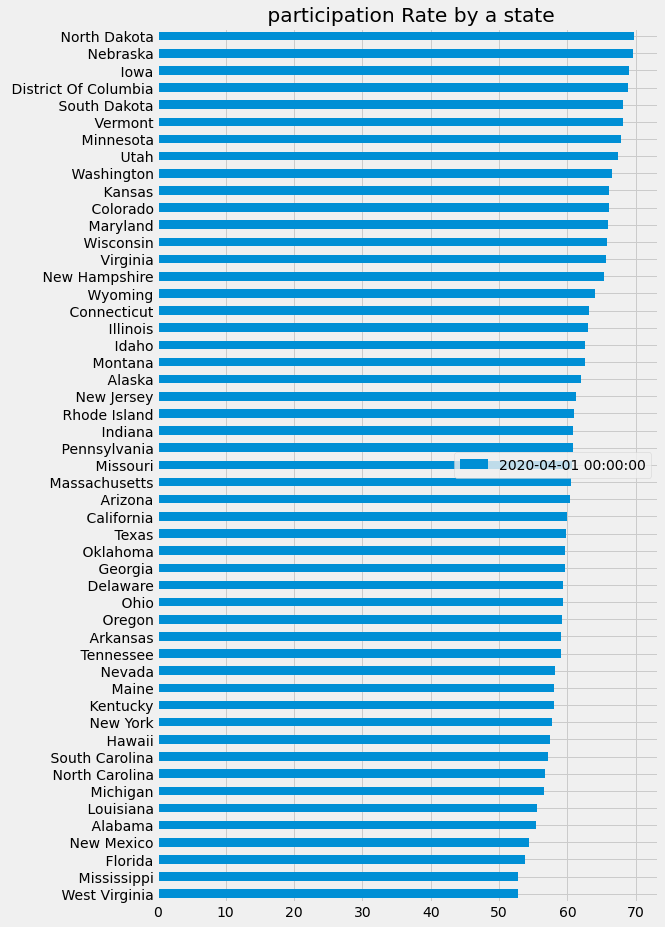

In [171]:
ax =part_results.loc[part_results.index=="2020-04-01"].\
T\
.sort_values("2020-04-01")\
.plot(figsize=(8,15),kind="barh", title=" participation Rate by a state")
plt.show()

In [172]:
unuemploymentStates

,California,Texas,New York,Florida,Ohio,Michigan,Alabama,North Carolina,New Jersey,Pennsylvania,Kentucky,Massachusetts,Illinois,Wisconsin,Iowa,Colorado,Washington,New Mexico,Minnesota,Tennessee,Indiana,Missouri,Virginia,Georgia,West Virginia,Arizona,Nevada,Utah,South Carolina,Arkansas,Oregon,North Dakota,Louisiana,Maryland,Oklahoma,Alaska,Mississippi,Hawaii,Kansas,Idaho,the District of Columbia,Maine,Connecticut,Nebraska,South Dakota,Montana,Wyoming,Delaware,Midwest Census Region,New Hampshire,Northeast Census Region,Rhode Island,Vermont,South Census Region,West Census Region,New England Census Division,East South Central Census Division
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.4,10.3,8.0,5.6,10.5,6.6,5.8,4.3,5.8,8.5,8.6,6.0,6.0,6.6,5.9,6.1,8.4,7.5,10.2,9.2,5.8,7.4,7.3,9.5,3.4,6.3,6.4,5.8,7.1,6.7,9.8,4.2,5.6,8.7,8.7,9.8,3.3,3.3,5.8,4.1,8.0,6.8,6.5,9.6,7.8,8.6,6.9,8.6,9.6,6.2
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.4,10.3,8.1,5.6,10.5,6.6,5.8,4.3,5.7,8.5,8.7,6.0,6.0,6.6,5.9,6.1,8.4,7.5,10.2,9.2,5.9,7.4,7.3,9.5,3.4,6.3,6.4,5.8,7.1,6.7,9.8,4.2,5.6,8.7,8.7,9.8,3.3,3.3,5.8,4.1,8.0,6.8,6.5,9.6,7.8,8.6,6.9,8.6,9.6,6.2
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,6.4,10.3,8.1,5.6,10.5,6.6,5.7,4.3,5.7,8.4,8.7,5.9,6.0,6.5,5.9,6.1,8.4,7.5,10.1,9.2,5.8,7.3,7.3,9.4,3.4,6.3,6.4,5.8,7.0,6.6,9.8,4.2,5.6,8.6,8.6,9.8,3.3,3.2,5.8,4.1,8.0,6.8,6.5,9.6,7.7,8.6,6.9,8.6,9.6,6.1
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,6.3,10.3,8.1,5.6,10.3,6.6,5.6,4.2,5.6,8.5,8.6,5.8,6.0,6.3,6.0,6.0,8.3,7.5,10.0,9.0,5.8,7.2,7.2,9.2,3.5,6.4,6.4,5.8,6.9,6.4,9.7,4.2,5.6,8.5,8.6,9.6,3.2,3.1,5.8,4.0,8.1,6.7,6.5,9.5,7.7,8.6,6.8,8.5,9.4,6.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,6.1,10.3,8.1,5.5,10.1,6.6,5.5,4.1,5.6,8.5,8.6,5.7,5.9,6.0,6.0,5.9,8.1,7.4,9.8,8.9,5.7,7.0,7.1,9.1,3.6,6.5,6.5,5.7,6.9,6.3,9.4,4.2,5.6,8.4,8.5,9.4,3.1,3.1,5.8,3.9,8.3,6.6,6.5,9.5,7.7,8.5,6.7,8.5,9.3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,4.1,4.7,2.7,4.0,4.1,2.6,3.5,4.0,4.2,3.8,3.6,4.5,3.1,2.6,3.4,3.7,4.4,1.9,3.4,2.8,2.5,2.6,2.8,3.9,3.5,4.4,2.0,3.1,3.4,3.7,2.3,3.5,4.3,3.1,4.6,3.6,4.0,2.5,2.7,5.1,3.1,4.1,2.1,2.3,2.8,3.1,4.5,3.4,2.0,4.1,2.8,2.1,3.4,3.7,3.4,3.3
2022-09-01,3.8,4.0,4.3,2.5,4.0,4.1,2.6,3.6,3.3,4.1,3.8,3.4,4.5,3.2,2.7,3.4,3.7,4.2,2.0,3.4,2.8,2.4,2.6,2.8,4.0,3.7,4.4,2.1,3.2,3.5,3.8,2.2,3.4,4.0,3.2,4.4,3.6,3.5,2.6,2.8,4.7,3.3,4.0,2.2,2.3,2.9,3.3,4.3,3.4,2.2,3.9,3.1,2.1,3.3,3.7,3.3,3.3
2022-10-01,4.0,4.0,4.3,2.7,4.2,4.2,2.7,3.8,3.4,4.0,3.9,3.5,4.6,3.3,2.9,3.6,3.8,4.3,2.1,3.5,3.0,2.6,2.7,2.9,4.0,3.9,4.6,2.1,3.3,3.6,4.1,2.3,3.3,4.5,3.4,4.5,3.8,3.3,2.8,2.9,4.8,3.6,4.3,2.4,2.4,3.0,3.5,4.3,3.5,2.4,3.9,3.4,2.3,3.4,3.8,3.4,3.4
2022-11-01,4.1,4.0,4.3,2.6,4.2,4.3,2.7,3.9,3.4,4.0,4.0,3.4,4.7,3.3,3.1,3.5,4.0,4.1,2.3,3.5,3.0,2.7,2.8,3.0,4.1,4.1,4.9,2.2,3.3,3.7,4.3,2.3,3.3,4.3,3.4,4.5,3.9,3.3,2.8,3.0,4.6,3.7,4.2,2.5,2.4,2.9,3.6,4.4,3.6,2.6,3.8,3.6,2.5,3.4,3.9,3.4,3.5


In [174]:
for name in unuemploymentStates.columns:
  if name not in part_id_to_dict.values():
    unuemploymentStates.drop(columns=name,inplace=True)

In [178]:
len(unuemploymentStates.columns)

50

In [176]:
unuemploymentStates=unuemploymentStates.rename(columns={" the District of Columbia":"District of Colombia"})

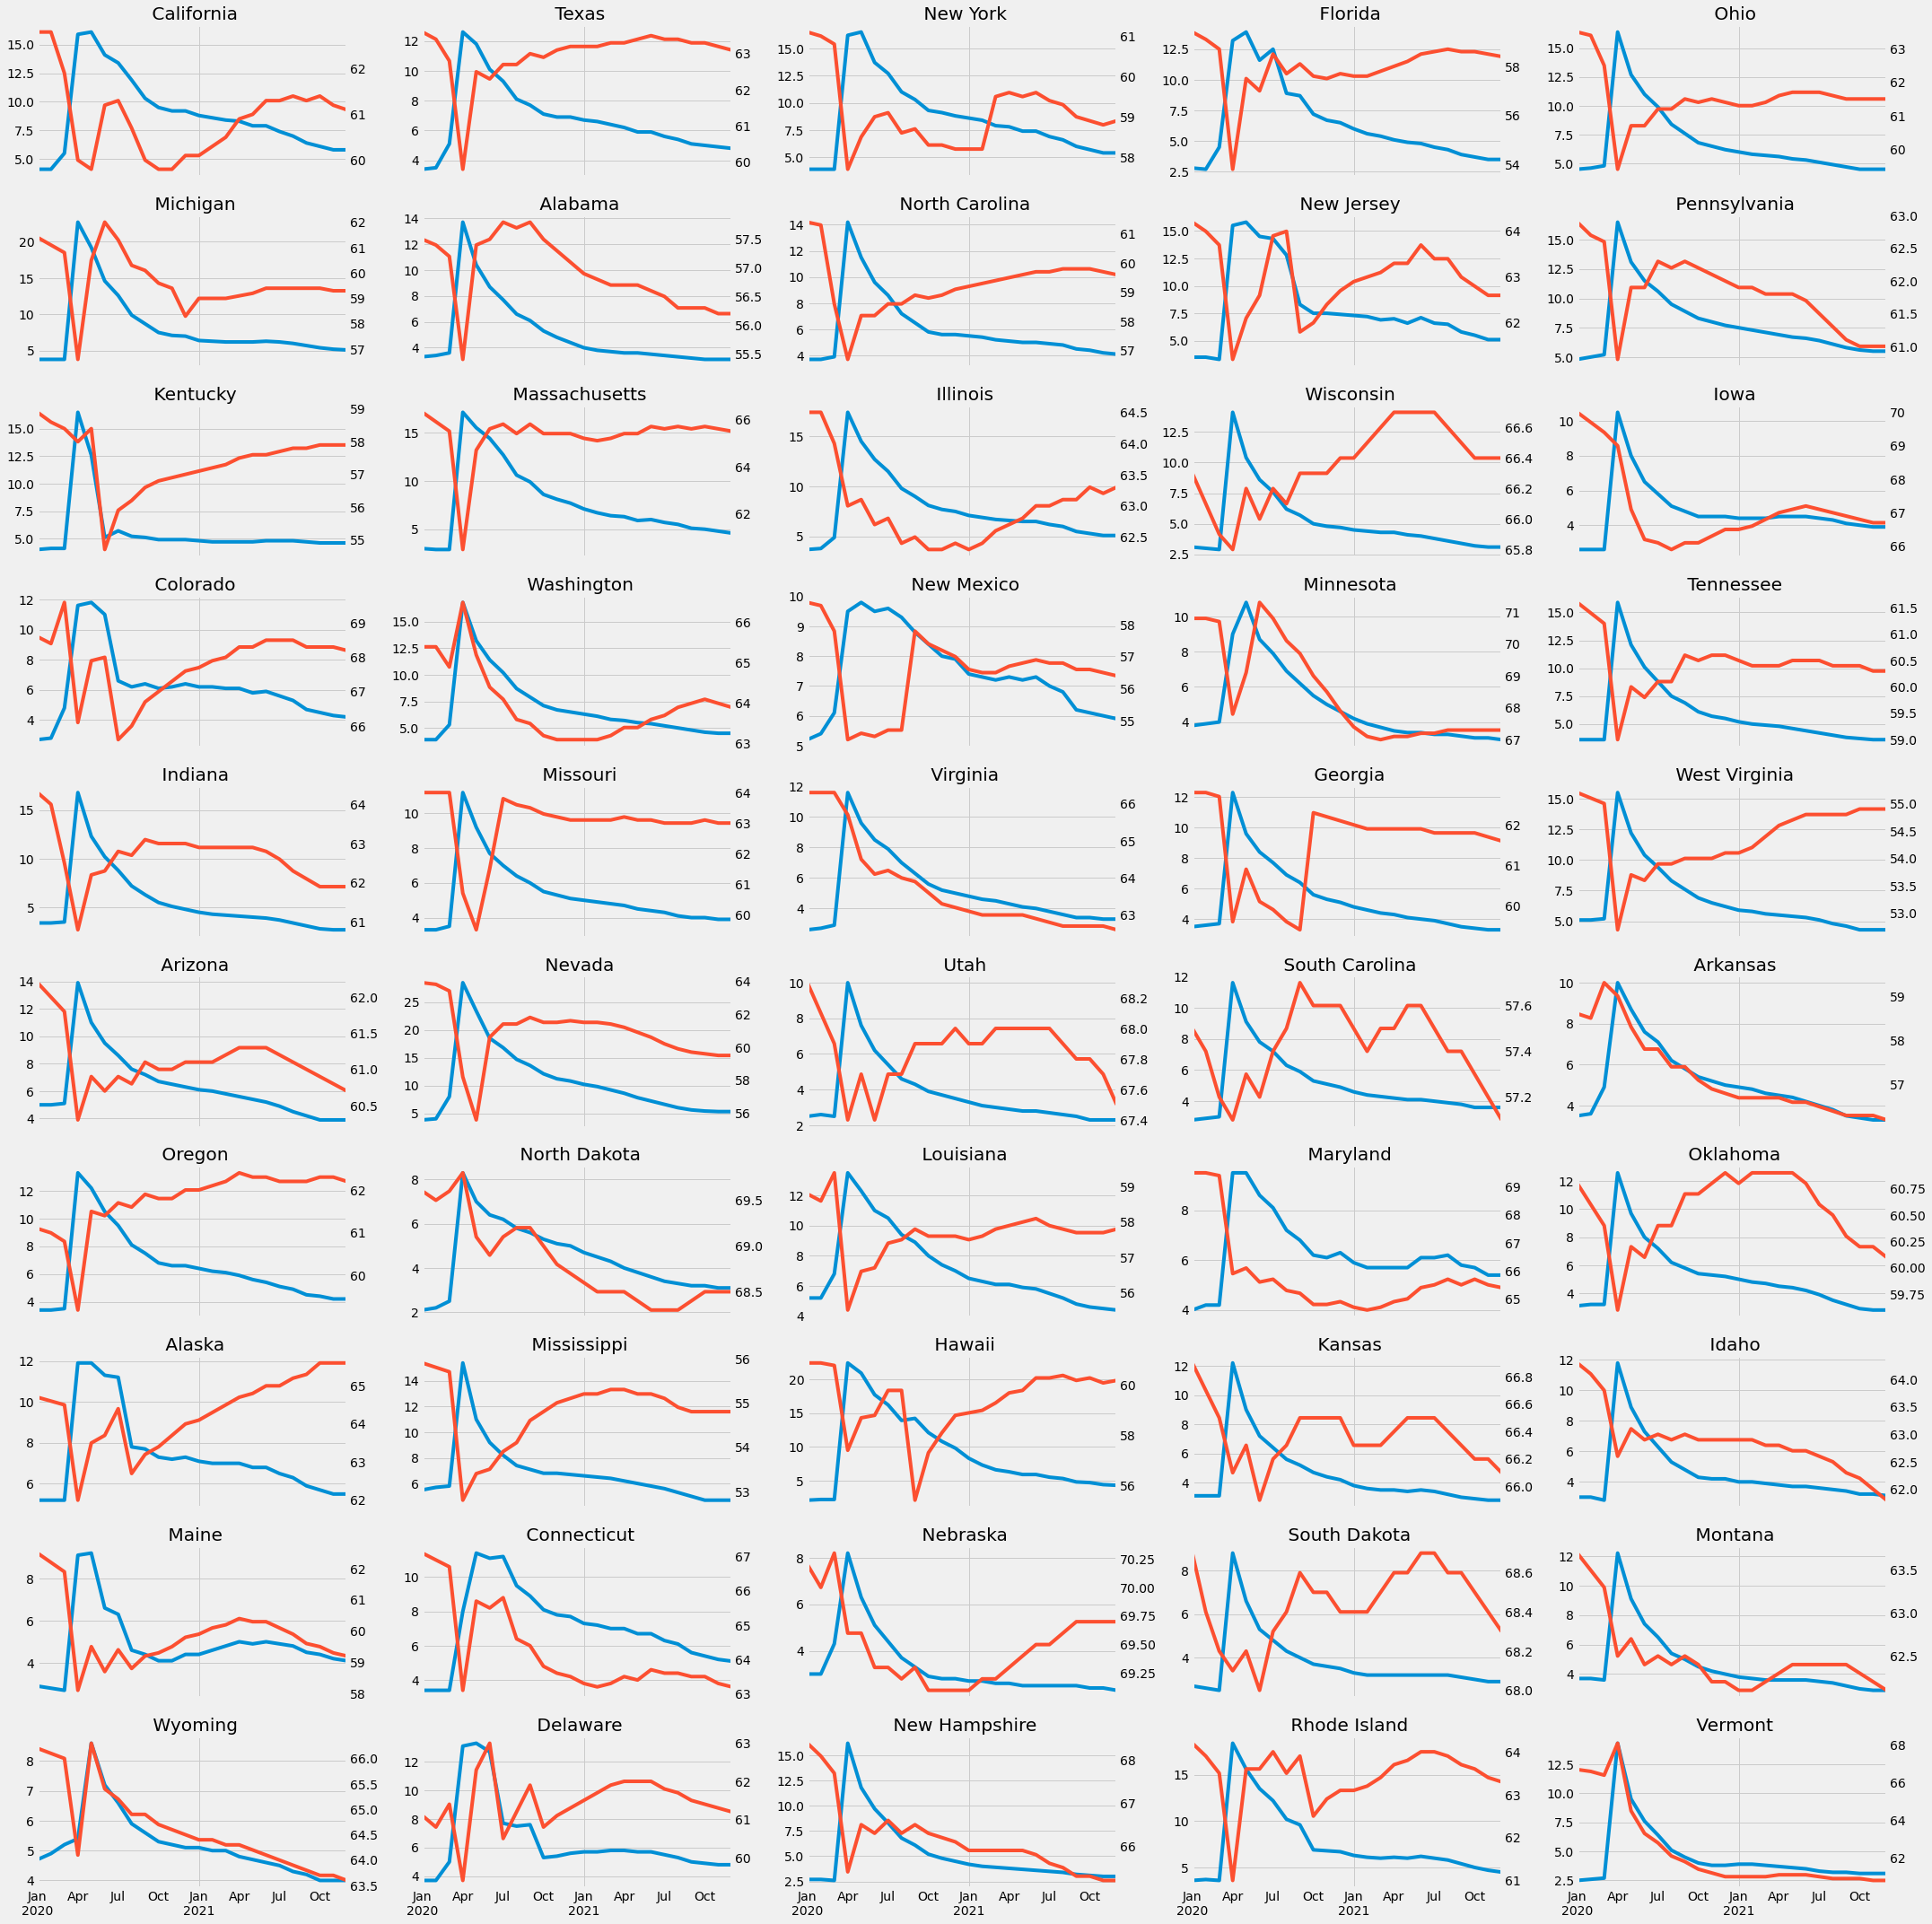

In [181]:
fig, axs =plt.subplots(10,5, figsize=(30,30),sharex=True)
axs=axs.flatten()
i=0
for state in unuemploymentStates.columns:
  ax2=axs[i].twinx()
  unuemploymentStates.query('index >=2020 and index <2022')[state].plot(ax=axs[i], label="Unemployment")
  part_results.query('index >=2020 and index <2022')[state].plot(ax=ax2,label="Participation",color=colpal[1]) 
  ax2.grid(False)
  axs[i].set_title(state)
  i+=1
plt.tight_layout()
plt.show()